# 1. Generate a sample from Poisson (Binomial, Gaussian) distribution 


In [1]:
from scipy.stats import binom, poisson, norm

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np


def generate_samples(distribution, **kwargs):
    return distribution.rvs(**kwargs)

from statsmodels.stats.gof import gof_binning_discrete

from scipy import stats


# 2. Test the hypothesis that the parameter is equal to a given value. Take correct and incorrect values and compare the test results


## Биномиальное распределение: проверка с истинным р 

Test passed


(array([  2.,   4.,  10.,   9.,  24.,  19.,  67.,  47., 126.,  66., 157.,
         76., 152.,  45.,  84.,  32.,  46.,  19.,  11.,   4.]),
 array([24. , 25.5, 27. , 28.5, 30. , 31.5, 33. , 34.5, 36. , 37.5, 39. ,
        40.5, 42. , 43.5, 45. , 46.5, 48. , 49.5, 51. , 52.5, 54. ]),
 <BarContainer object of 20 artists>)

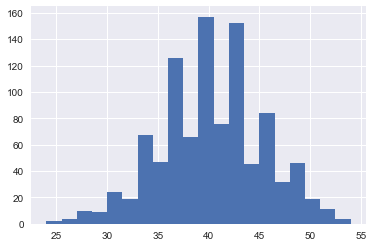

In [2]:
p = 0.4
n = 100
alpha = 0.05
samples = generate_samples(binom, p=p, n=n, size=1000)

freq, exp_freq, histsupp = gof_binning_discrete(samples, binom, (n, p))

(chi_val, p_val) = stats.chisquare(freq, exp_freq)

if p_val >= alpha:
    print('Test passed')
else:
    print('Test failed')
    
plt.hist(samples, bins=20)

##  Биномиальное распределение: проверка с p/2


In [3]:
p = 0.4
n = 100
alpha = 0.05
samples = generate_samples(binom, p=p, n=n, size=1000)

freq, exp_freq, histsupp = gof_binning_discrete(samples, binom, (n, p/2))

(chi_val, p_val) = stats.chisquare(freq, exp_freq)

if p_val >= alpha:
    print('Test passed')
else:
    print('Test failed')


Test failed


## Распределение Пуассона: проверка с истинным $\mu$

Test passed


(array([674.,   0.,   0.,   0.,   0., 265.,   0.,   0.,   0.,   0.,  52.,
          0.,   0.,   0.,   0.,   7.,   0.,   0.,   0.,   2.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
        2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <BarContainer object of 20 artists>)

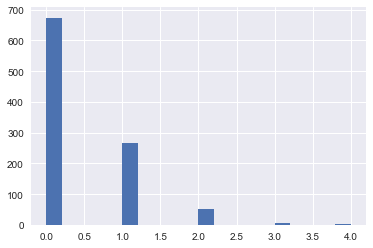

In [4]:
mu = 0.4
alpha = 0.05
samples = generate_samples(poisson, mu=mu, size=1000)

freq, exp_freq, histsupp = gof_binning_discrete(samples, poisson, (mu, ))

(chi_val, p_val) = stats.chisquare(freq, exp_freq)

if p_val >= alpha:
    print('Test passed')
else:
    print('Test failed')
plt.hist(samples, bins=20)

## Распределение Пуассона: проверка с $\frac{\mu}{2}$

In [5]:
mu = 0.4
alpha = 0.05
samples = generate_samples(poisson, mu=mu, size=1000)

freq, exp_freq, histsupp = gof_binning_discrete(samples, poisson, (mu/2, ))

(chi_val, p_val) = stats.chisquare(freq, exp_freq)

if p_val >= alpha:
    print('Test passed')
else:
    print('Test failed')

Test failed


## Нормальное распределение: проверка с истинными значением среднего

Test passed


(array([  5.,   8.,   9.,  10.,  31.,  39.,  63., 104., 111., 127., 106.,
         95., 106.,  71.,  58.,  29.,   9.,  11.,   4.,   4.]),
 array([-5.3587547 , -4.72569135, -4.092628  , -3.45956466, -2.82650131,
        -2.19343797, -1.56037462, -0.92731127, -0.29424793,  0.33881542,
         0.97187876,  1.60494211,  2.23800545,  2.8710688 ,  3.50413215,
         4.13719549,  4.77025884,  5.40332218,  6.03638553,  6.66944888,
         7.30251222]),
 <BarContainer object of 20 artists>)

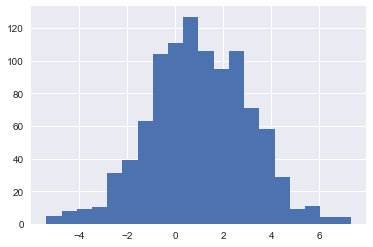

In [6]:
loc = 1
scale = 2
samples = generate_samples(norm, loc=loc, scale=scale, size=1000)

freq, exp_freq, histsupp = gof_binning_discrete(samples, norm, (loc, scale))

(chi_val, p_val) = stats.chisquare(freq, exp_freq)

if p_val >= alpha:
    print('Test passed')
else:
    print('Test failed')
plt.hist(samples, bins=20)

## Нормальное распределение: проверка со значением среднего в два раза меньше истинного

In [7]:
loc = 1
scale = 2
samples = generate_samples(norm, loc=loc, scale=scale, size=1000)

freq, exp_freq, histsupp = gof_binning_discrete(samples, norm, (loc/2, scale))

(chi_val, p_val) = stats.chisquare(freq, exp_freq)

if p_val >= alpha:
    print('Test passed')
else:
    print('Test failed')

Test failed


## Функция лог-правдоподобия (без логарифма маленькие значения, меньше машинной точности)

In [8]:
def norm_likelihood(loc=loc, scale=scale, samples=samples):
    return np.log(norm.pdf(samples, loc=loc, scale=scale)).sum()

In [9]:
norm_likelihood(loc=loc, scale=scale, samples=samples[:10])

-19.72344679801595

# 3. Construct the likelihood function and find the maximum likelihood estimate (MLE) ofthe parameter (for Gaussian only)


## Оценка MLE для среднего

In [10]:
from scipy.optimize import minimize

In [11]:
def neg_likelihood(*args, **kwargs):
    return -norm_likelihood(*args, **kwargs)

In [12]:
from functools import partial
minimize(partial(neg_likelihood, samples=samples[:10], scale=scale), x0=0.5)

      fun: 18.954159040125788
 hess_inv: array([[1]])
      jac: array([4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 1
     njev: 3
   status: 0
  success: True
        x: array([0.21550642])

# 4. Construct the prior distribution (gamma, Gaussian, beta) from this sample


In [65]:
from scipy.stats import beta, binom

In [66]:
p = 0.4
n = 100
size = 1000
samples = generate_samples(binom, p=p, n=n, size=size)

(array([  7.,  30.,  57., 160., 134., 246., 192., 108.,  49.,  17.]),
 array([25. , 27.8, 30.6, 33.4, 36.2, 39. , 41.8, 44.6, 47.4, 50.2, 53. ]),
 <BarContainer object of 10 artists>)

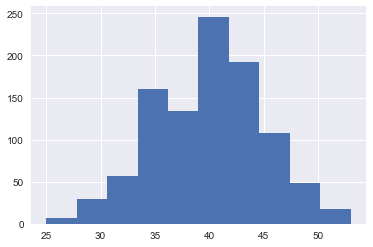

In [67]:
plt.hist(samples)

$$\mathbb{E}\left[x\right] = np$$
$$\mathbb{V}\left[x\right] = np(1-p)$$
$$1-p = \frac{\overline{\sigma}}{\overline{\mu}} \quad \Rightarrow \quad p = 1 -  \frac{\overline{\sigma}}{\overline{\mu}}$$
$$n = \dfrac{\overline{\mu}}{1 - \frac{\overline{\sigma}}{\overline{\mu}}}$$

$$\mathbb{E}(p) = \dfrac{\alpha}{\alpha + \beta} = 1 -  \frac{\overline{\sigma}}{\overline{\mu}}$$
Возьмем в качестве $\beta = y - \alpha,\ \alpha = py $. Если $y = 1$, то $\alpha = p, \quad \beta = 1 - p$.



In [68]:
scaling_factor = 10
alpha = scaling_factor*(1 - samples.var()/samples.mean())
beta = scaling_factor - alpha

# 5. Generate a sample from Poisson (Gaussian, binomial) distribution (of a different size and with a different parameter value)

In [69]:
new_p = 0.2
new_n = 100
new_size = 1000
new_samples = generate_samples(binom, p=new_p, n=new_n, size=new_size)

# 6. Construct the likelihood function and find the maximum likelihood estimate (MLE) of the parameter 

In [70]:
def likelihood(p, n=n, samples=samples):
    return np.prod(binom.pmf(samples, p=p, n=n))

Правдоподобие такое же, как у $N\cdot n$ испытаний Бернулли
$$L(p;x)= C(n, x) p^x(1-p)^{Nn-\sum x}$$
$$p_{MLE} = \frac{\sum x}{N\cdot n}$$

In [71]:
new_p_mle = new_samples.mean()/new_n
print(new_p_mle)

0.20132000000000003


# 7. Construct from the prior and likelihood the posterior distribution (gamma, Gaussian, beta).

In [72]:
from functools import partial
def approx_aposteriori(p, n, samples):
    return likelihood(p, n, samples=samples)*beta.pmf(p, alpha=alpha, beta=beta)

$$f(x|n, \alpha, \beta) = \int_0^1 L(p;x) \pi(p|\alpha, \beta) dp = {n\choose k} \dfrac{B(x + \alpha, n - x + \beta)}{B(\alpha, \beta)}$$

https://en.wikipedia.org/wiki/Beta-binomial_distribution

In [73]:
from scipy.stats import betabinom

# 8. Construct a histogram of the posterior and compare with the histogram of its Gaussian approximation

3.8069043434597027
6.193095656540297


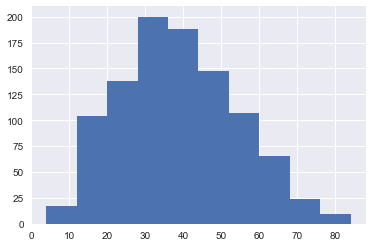

In [74]:
aposteri_samples = generate_samples(betabinom, n=new_n, a=alpha, b=beta, size=new_size)
plt.hist(aposteri_samples)
print(alpha)
print(beta)

In [ ]:
#TODO Gaussian approximation

# 9. Generate a sample from posterior

In [75]:
aposteri_samples


array([40, 13, 34, 34, 58, 39, 23, 46, 38, 28, 39, 49, 27, 55, 41, 19, 62,
       57, 28, 70, 18, 15, 51, 29, 26, 30, 28, 72, 23, 59, 17, 64, 47, 56,
       35, 43, 45, 32, 33, 41, 36, 27, 66, 11, 31, 20, 67, 17, 26, 40, 29,
       55, 50, 32, 45, 53, 17,  8, 36, 37, 37, 23, 14, 17, 17, 56, 34, 52,
       35, 52, 43, 33, 73, 34, 23, 31, 10, 13, 59, 32, 35, 11, 43, 26, 35,
       57, 19, 25, 20, 32, 30, 40, 19, 67, 39, 36, 27, 35, 42, 47, 60, 30,
       36, 31, 29, 22, 21, 51, 49, 47, 50, 14, 28, 42, 35, 37, 53, 21, 63,
       43, 20, 40, 27, 19, 28, 16, 43, 24, 55, 40, 29, 21, 39, 45, 23, 40,
       33, 17, 54, 37, 16, 45, 22, 30, 25, 44, 17, 18, 31, 29, 36, 37, 34,
       26, 60, 44, 32, 39, 32, 48, 33, 14, 38, 47, 29, 46, 36, 12, 44, 38,
       43, 38, 25, 36, 35, 24, 49, 42, 51, 22, 52, 35, 42, 19, 48, 45, 54,
       48, 25, 67, 19, 34, 13, 34, 35, 28, 27, 34, 21, 13, 30, 41, 36, 39,
       41, 48, 21, 26, 15, 19, 43, 48, 33, 40, 29, 28, 48, 38, 55, 37, 44,
       57, 31, 31, 34, 39

# 10. Find theoretical and sample posterior mean, median, variance, and st. deviation of the parameter.


In [76]:
import numpy as np

### Posterior mean

$$
\bar{\theta}=\int \theta p(\theta \mid \boldsymbol{y}) d \theta
$$
where
$$
p(\theta \mid y) \equiv p(\theta \mid \bar{y})=\frac{\beta^{\bar{\alpha}}}{\Gamma(\bar{\alpha})} \theta^{\bar{\alpha}-1} \mathrm{e}^{-\bar{\beta} \theta}
$$
$$
\bar{\theta}=\frac{1}{B(\bar{\alpha}, \bar{\beta})} \int_{0}^{1} \theta \theta^{\bar{\alpha}-1}(1-\theta)^{\bar{\beta}-1} d \theta
$$

$$
for\ beta-binomial\ distribution\ mean\ is\ \frac{n \alpha}{\alpha+\beta}
$$

In [93]:
theta = n*alpha/(alpha + beta)
aposteri_samples_mean = np.mean(aposteri_samples)
print(theta, aposteri_samples_mean )

38.06904343459703 38.295


### Posterior median 

$$
0.5=\int_{\theta_{M}}^{1} p(\theta \mid y) d \theta
$$


In [86]:
aposteri_samples_median = np.median(aposteri_samples)
samples_median = np.median(samples)
print(samples_median, aposteri_samples_median)


40.0 37.0


### Variance

$$
\bar{\sigma}^{2}=\int(\theta-\bar{\theta})^{2} p(\theta \mid y) d \theta
$$
$$
\frac{1}{B(\bar{\alpha}, \bar{\beta})} \int_{0}^{1} \theta^{2} \theta^{\bar{\alpha}-1}(1-\theta)^{\bar{\beta}-1} d \theta
$$

$$
\frac{n \alpha \beta(\alpha+\beta+n)}{(\alpha+\beta)^{2}(\alpha+\beta+1)}
$$


In [104]:
samples_var = n*alpha*beta*(alpha + beta + n)/((alpha + beta + 1)*(alpha + beta)**2) #theoretical
aposteri_samples_var = np.var(aposteri_samples) 
print(sigma,aposteri_samples_var)

235.7652275434468 231.06997499999997


### Standart deviation

In [105]:
samples_std, aposteri_samples_std = np.std(samples), np.std(aposteri_samples)

samples_std, aposteri_samples_std

(4.966598433535774, 15.200985987757504)

# 11. Plot the confidence interval and Bayesian (credible) interval for the parameter mean.

#### Confidence interval 

$$
\bar{X}-z_{\alpha / 2}\left(\frac{\sigma}{\sqrt{n}}\right)<\mu<\bar{X}+z_{\alpha / 2}\left(\frac{\sigma}{\sqrt{n}}\right)\ where
$$  $$
\boldsymbol{\sigma}- standart\ deviation 
$$ 

$$
\begin{array}{|l|l|}
\hline \begin{array}{l}
\text { Confidence } \\
\text { Levels }
\end{array} & \begin{array}{l}
z \text { -Critical } \\
\text { Values }
\end{array} \\
\hline 50 \% & 0.674 \\
\hline 75 \% & 1.150 \\
\hline 90 \% & 1.645 \\
\hline 95 \% & 1.960 \\
\hline 99 \% & 2.575 \\
\hline 99.9 \% & 3.291 \\
\hline
\end{array}
$$

In [29]:
from scipy.stats import norm
import numpy as np

In [30]:
norm.ppf(0.975) #95%

1.959963984540054

In [31]:
norm.ppf(0.995) #99%

2.5758293035489004

In [32]:
norm.ppf(0.95) #90%

1.6448536269514722

In [121]:
import numpy as np
import scipy.stats as st

#define sample data
data = aposteri_samples

#create 95% confidence interval for population mean weight
con_int = st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data)) 
print('Confidence interval:', con_int)


Confidence interval: (37.35123559285351, 39.23876440714649)


In [122]:
#create 99% confidence interval for same sample
conf_inter = st.norm.interval(alpha=0.99, loc=np.mean(data), scale=st.sem(data))
print('Confidence interval:', conf_inter)

Confidence interval: (37.0561860301977, 39.5338139698023)


In [123]:
import numpy as np
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

Text(0.5, 1.0, 'Confidence interval')

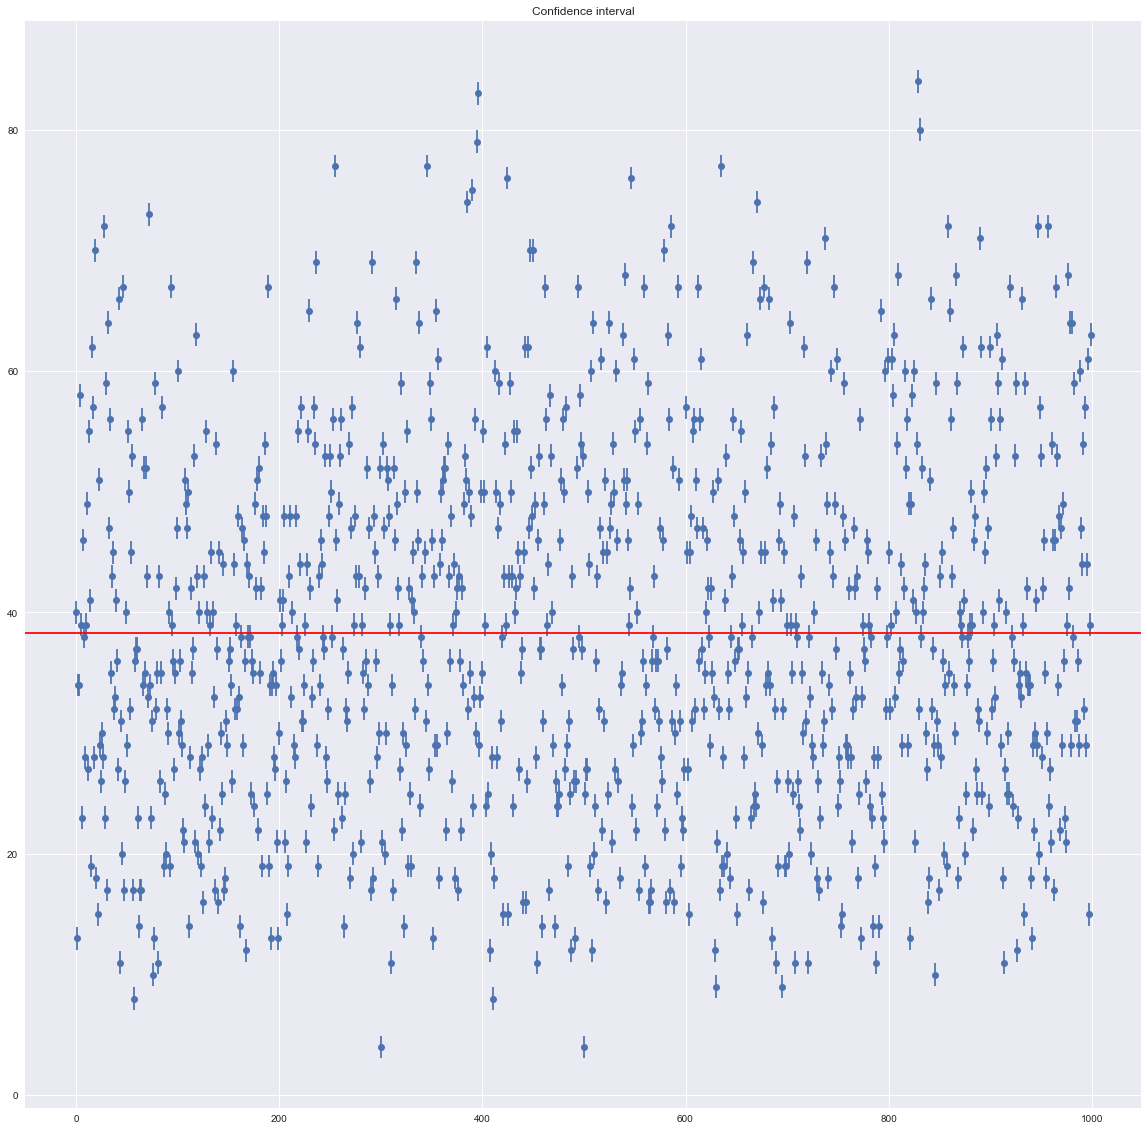

In [124]:
import numpy as np
import matplotlib.pyplot as plt



plt.figure(figsize=(20, 20))
mean, err = mean_confidence_interval(data=data)
plt.axhline(mean, color='r')

plt.errorbar(np.arange(len(aposteri_samples)), data, yerr=err, fmt='o')
plt.xticks(ticks=None)
plt.title("Confidence interval")


#### Вayesian credible interval

In [125]:

from scipy import stats
data = aposteri_samples
mean, var, std = stats.bayes_mvs(data)
print('Mean is:', mean, '\n', 'Variance is:', var, '\n', 'Std_dev is:', std)


Mean is: Mean(statistic=38.295, minmax=(37.5031932724682, 39.0868067275318)) 
 Variance is: Variance(statistic=231.76527081243728, minmax=(215.2205623151322, 249.3656427121182)) 
 Std_dev is: Std_dev(statistic=15.220021965908114, minmax=(14.67039748320175, 15.7913154205759))


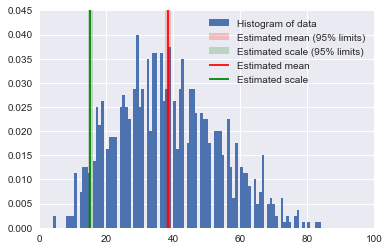

In [128]:
n_samples = 100000
data = aposteri_samples
res_mean, res_var, res_std = stats.bayes_mvs(data, alpha=0.95)

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(data, bins=100, density=True, label='Histogram of data')
ax.vlines(res_mean.statistic, 0, 0.5, colors='r', label='Estimated mean')
ax.axvspan(res_mean.minmax[0],res_mean.minmax[1], facecolor='r',
           alpha=0.2, label=r'Estimated mean (95% limits)')
ax.vlines(res_std.statistic, 0, 0.5, colors='g', label='Estimated scale')
ax.axvspan(res_std.minmax[0],res_std.minmax[1], facecolor='g', alpha=0.2,
           label=r'Estimated scale (95% limits)')

ax.legend(fontsize=10)
ax.set_xlim([0, 100])
ax.set_ylim([0, 0.045])
plt.show()